# Stepwise methods to data exploration
 - Import data, and explore features: Feature exploration is performed to to have a thorough understanding of the dataframe.
     - Questions to ask are the following:
         - ~What are the features available?~
         - ~What are the data types of each feature?~
         - ~Are there Null, or NaN values in the data?~
         - ~What are the steps necessary to clean the data?~
         - ~Are there target features that are interesting to me/my questions?~
         - Determine the statistical analysis that can be performed given the available data.
 - Cleaning and feature engineering
      - Once a good understanding of the data has been established the following questions will help guide you through the cleaning and analysis of the dataframe:
          - What questions can be asked with the available data, and what questions would I like to ask from the data?
          - Has the data been cleaned enough to help answer the questions I would like to ask of the data?
          - Are there features I can engineer to ask better questions, or obtain answers to the questions I already have?
          - Make sure to write down an overarching qustion when feature engineering so that it remains a guiding tool during your analysis.
 - Analysis and Visualizations
     - Perform sound statistical tests, and provide visualizations to support those tests
     - The type of libraries used are vital in rendering aesthetically, and user friendly visualizations.
     - [MatplotLib](https://matplotlib.org) is a more intricate library to work with.  [Plotly](https://plotly.com/python/) provides a more user friendly rendition that can be inbetted and interactive on a portfolio site.

###### Note: This exploration is being performed to practice using data visualization tools.  A large portion of this work can be done with the [Pandas Profilling Package](https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html).

In [9]:
! pip install plotly
! pip install cufflinks
! pip install jupyter_dash
# ! pip install 

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from datetime import datetime, timedelta
from scipy.stats.distributions import chi2

import matplotlib
import matplotlib.pyplot as plt

import plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from IPython.display import IFrame

In [2]:
# Reading in data as csv with delimiter ';'
# Note: The previously used dataframe was 'sleepdata.csv', now using an updated
# dataframe that contains new data (including the data from the aforementioned df)

df = pd.read_csv('./sleepdata2.csv', delimiter=';')

In [3]:
# What are the features available in my dataframe?

# Features that standout are [0:4]
# The target feature being 'Sleep quality'

df.head(3)

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2018-08-21 00:17:44,2018-08-21 06:31:59,55%,6:14,NaN,NaN,0,0
1,2018-08-22 00:08:58,2018-08-22 06:48:15,77%,6:39,NaN,NaN,0,0
2,2018-08-23 00:26:59,2018-08-23 05:14:15,57%,4:47,NaN,NaN,0,0


In [4]:
# What are the datatypes of the features?

# .info() provides an insight into the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Start             599 non-null    object
 1   End               599 non-null    object
 2   Sleep quality     599 non-null    object
 3   Time in bed       599 non-null    object
 4   Wake up           192 non-null    object
 5   Sleep Notes       177 non-null    object
 6   Heart rate        599 non-null    int64 
 7   Activity (steps)  599 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 37.6+ KB


In [5]:
# Note: 'Start' and 'End' colummns should be datetime types but appear
# to be objects; 'Sleep quality' and 'Time in bed' are also float, and
# datetime respectively but appear as object as well.

# Are there Null vallues in the dataframe?

print(f"Sleep data null values in:\n{df.isnull().sum()}")

Sleep data null values in:
Start                 0
End                   0
Sleep quality         0
Time in bed           0
Wake up             407
Sleep Notes         422
Heart rate            0
Activity (steps)      0
dtype: int64


In [6]:
# 'Wake up', 'Heart rate' and 'Sleep Notes' columns appear to contain
# null values (not worth exploring further)

# Dxploring 'Heart rate', 'Wake up', and 'Sleep Notes' columns

df[['Heart rate', 'Wake up', 'Sleep Notes']].describe(include=['object', 'int', 'float'])

,Heart rate,Wake up,Sleep Notes
count,599.000000,192,177
unique,NaN,3,38
top,NaN,:|,Ate late:Coffee:Stressful day
freq,NaN,138,40
mean,2.425710,NaN,NaN
std,11.852525,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,0.000000,NaN,NaN
75%,0.000000,NaN,NaN


In [7]:
# Safe to say that the majority of the available values will
# not contribute much to the analysis, so columns can be discarted.

# Cleaning data: Step 1
# Dropping the 'Heart rate', 'Wake up', and 'Sleep Notes' columns

df = df.drop(columns=['Heart rate', 'Wake up', 'Sleep Notes']) #, 'Activity (steps)'])

df.head()

,Start,End,Sleep quality,Time in bed,Activity (steps)
0,2018-08-21 00:17:44,2018-08-21 06:31:59,55%,6:14,0
1,2018-08-22 00:08:58,2018-08-22 06:48:15,77%,6:39,0
2,2018-08-23 00:26:59,2018-08-23 05:14:15,57%,4:47,0
3,2018-08-26 02:22:35,2018-08-26 06:25:43,35%,4:03,0
4,2018-08-27 00:54:25,2018-08-27 08:24:27,62%,7:30,0


In [8]:
# Cleaning data: Step 2

# Convert string percent values to floats

df['Sleep quality'] = df['Sleep quality'].str.rstrip('%').astype('float') / 100
df['Sleep quality'].head()

0    0.55
1    0.77
2    0.57
3    0.35
4    0.62
Name: Sleep quality, dtype: float64

In [9]:
# 'Start' and 'End' remain as objects
# Change to datetime

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start             599 non-null    object 
 1   End               599 non-null    object 
 2   Sleep quality     599 non-null    float64
 3   Time in bed       599 non-null    object 
 4   Activity (steps)  599 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 23.5+ KB


In [10]:
# Goal: break down 'Start' and 'End' features containing
# days and times of the day

# Looking to create a column of days from data contained in the 'Start' column

print(f"Time in bed column: \n{df['Time in bed'].describe()} \n\nStart column: \n{df['Start'].describe()}")

Time in bed column: 
count      599
unique     267
top       5:46
freq         7
Name: Time in bed, dtype: object 

Start column: 
count                     599
unique                    599
top       2019-08-30 01:35:28
freq                        1
Name: Start, dtype: object


In [11]:
# Pandas documentation states 'dayofweek' starts with mon = 0
# Test to find day of the week

copy_1_date = pd.Timestamp(df['Start'][3])
print(f"Date: {df['Start'][0]} \nWeekday: {copy_1_date.day_name()} \nDay of the week as int: {copy_1_date.dayofweek}")

Date: 2018-08-21 00:17:44 
Weekday: Sunday 
Day of the week as int: 6


# Interesting features to explore further:
- Reconstruct weekday column by running a for loop to make sure that the Start and End columns utilize the start day adequately. Reason for this is that some days the sleep time was past midnight, which implies that it is in fact using a misleading day of the week as start day.
    - Example: If on a Saturday night, time to bed was past midnight, the data shows that the day to bed was Sunday.  This could be corrected using a for loop on the 'Start' column.
    - Psudo code:

```python
for elem in range(len(column)):
    if day_of_week == 0 and start.day_of_week == end.day_of_week::
        change day to 6 (sunday)
    elif start.day_of_week == end.day_of_week:
        change start.day_of_week to previous day and append to new column of say of week.
```

## Analysis to be performed:
- Here we can already see that we can break down the 'Start' and 'End' columns into multiple different parts.  These parts will help in analyzing the data.  We can see if there are statistical differences between days of the week, times to bed, or even incorporate a new dataset containing weather patters and phenomena to see if there are any correlations.

## Questions answered:
1. ~Features available~
2. ~What are the datatypes (they have been identified and are being changed as necesasry)~
3. ~Null and NaN values have been dealt with~
4. ~Steps to cleaning data have started~
 - ~one step that needs to be completed is creating a function to deal with accurate day of the night to bed.~
5. ~The target feature here is `Sleep quality`~
6. ~What are the stats to be used.~  (ANOVA)

## Next steps: Feature engineering and stats
- Exploring for-loop to apply

In [12]:
# Step 1: change datatime for 'Start' and 'End' columns

df['Start'] = pd.to_datetime(df['Start'], infer_datetime_format=True)
df['End'] = pd.to_datetime(df['End'], infer_datetime_format=True)

print(f"Start date test:\n{df['Start'].head(3)}\n\nEnd date test:\n{df['End'].head(3)}")

Start date test:
0   2018-08-21 00:17:44
1   2018-08-22 00:08:58
2   2018-08-23 00:26:59
Name: Start, dtype: datetime64[ns]

End date test:
0   2018-08-21 06:31:59
1   2018-08-22 06:48:15
2   2018-08-23 05:14:15
Name: End, dtype: datetime64[ns]


In [13]:
# This cell will contain a for loop
# that takes in the 'Start' and 'End' columns
# to create a third column containing the accurate
# day the person went to bed, and not the day in the
# 'End' column.

wkday_int = []

for elem in range(len(df['Start'])):
    if (df['Start'][elem].dayofweek == 0) and (df['Start'][elem].dayofweek == df['End'][elem].dayofweek):
        wkday_int.append(6)
    elif df['Start'][elem].dayofweek == df['End'][elem].dayofweek:
        wkday_int.append(df['End'][elem].dayofweek - 1)
    else:
        wkday_int.append(df['Start'][elem].dayofweek)

In [14]:
# looking at shape to make sure it aligns with the DF

pd.DataFrame(wkday_int).shape

(599, 1)

In [15]:
# Incorporating wkday_int into dataframe

df['Weekday to Bed (int)'] = pd.DataFrame(wkday_int)

In [16]:
# .map() method applied to df with 'Weekday categories' column

d = {0: 'Monday', 
     1: 'Tuesday', 
     2: 'Wednesday', 
     3: 'Thursday', 
     4: 'Friday',
     5: 'Saturday', 
     6: 'Sunday'}
     
df['Weekday to bed (name)'] = df['Weekday to Bed (int)'].map(d)
df.head()

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday to Bed (int),Weekday to bed (name)
0,2018-08-21 00:17:44,2018-08-21 06:31:59,0.55,6:14,0,0,Monday
1,2018-08-22 00:08:58,2018-08-22 06:48:15,0.77,6:39,0,1,Tuesday
2,2018-08-23 00:26:59,2018-08-23 05:14:15,0.57,4:47,0,2,Wednesday
3,2018-08-26 02:22:35,2018-08-26 06:25:43,0.35,4:03,0,5,Saturday
4,2018-08-27 00:54:25,2018-08-27 08:24:27,0.62,7:30,0,6,Sunday


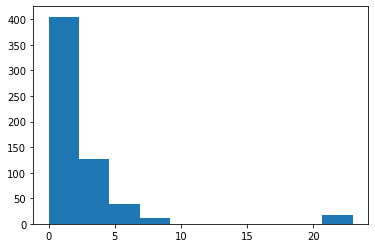

In [17]:
# Consider taking the ratios of minutes and incorporating them back in
# also consider doing the same with seconds

start_hour = df['Start'].apply(lambda element: element.hour)
start_min = df['Start'].apply(lambda element: element.minute)
# print(start_min.describe(percentiles=[.5, .75]))

# print(start_min.value_counts())



plt.hist(start_hour)
plt.show()

In [17]:
# Changing dtype for 'Time in bed' column with a today's time stamp; for further cleaning
# Formatted to only include the time.

df['Time in bed'] = pd.to_datetime(df['Time in bed']).dt.time
df.head()

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday to Bed (int),Weekday to bed (name)
0,2018-08-21 00:17:44,2018-08-21 06:31:59,0.55,06:14:00,0,0,Monday
1,2018-08-22 00:08:58,2018-08-22 06:48:15,0.77,06:39:00,0,1,Tuesday
2,2018-08-23 00:26:59,2018-08-23 05:14:15,0.57,04:47:00,0,2,Wednesday
3,2018-08-26 02:22:35,2018-08-26 06:25:43,0.35,04:03:00,0,5,Saturday
4,2018-08-27 00:54:25,2018-08-27 08:24:27,0.62,07:30:00,0,6,Sunday


In [19]:
# Checking to see if timedelta can be applied to .date() method
# so that we can create a column 'Date' containing the accurate 
# dates the person went to bed.

print(df['Start'][0].date())
print(df['Start'][0].date() - timedelta(days=1))
# df.info()

2018-08-21
2018-08-20


In [18]:
# Creating a column containg the dates, and then creating a column cointaning
# time to bed, and time to rise

'''
To add this new 'Date' column applied the loop that was previously implemented to create
the 'Weekday (int)', and 'Weekday to bed (name)', but instead use the .dt.date method
'''

date_lst = []

for elem in range(len(df['Start'])):
    if df['Start'][elem].date() == df['End'][elem].date():
        date_lst.append(df['Start'][elem].date() - timedelta(days=1))
    else:
        date_lst.append(df['Start'][elem].date())

df['Date to bed'] = date_lst
df.head(3)

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday to Bed (int),Weekday to bed (name),Date to bed
0,2018-08-21 00:17:44,2018-08-21 06:31:59,0.55,06:14:00,0,0,Monday,2018-08-20
1,2018-08-22 00:08:58,2018-08-22 06:48:15,0.77,06:39:00,0,1,Tuesday,2018-08-21
2,2018-08-23 00:26:59,2018-08-23 05:14:15,0.57,04:47:00,0,2,Wednesday,2018-08-22


In [41]:
# we need categorical variable to do a Chi**2 test


cut_points = [0, .80, 1]

label_names = ['< 80%',
               '≥ 80%']
               
df['Sleep Quality Categories'] = pd.cut(df['Sleep quality'], cut_points, labels=label_names)


In [20]:
# New Dataframe excluding the 'Wake up' and 'Sleep Notes' column

'''
'Wake up' and 'Slep Notes' columns are no longer a part of the
DataFrame, hence this cell is irrelevant.
'''

# new_df = df[['Start', 
#              'End', 
#              'Sleep quality', 
#              'Time in bed',
#              'Activity (steps)', 
#              'Weekday', 
#              'Date', 
#              'Sleep Quality Categories',
#              'Weekday categories']]

# new_df.head()

"\n'Wake up' and 'Slep Notes' columns are no longer a part of the\nDataFrame, hence this cell is irrelevant.\n"

In [21]:
'''
Previously, 'Date' (now renamed ['Date to bed']) contained duplicate 
values, but now that should've been minimized given the for loop applied
'''

df['Date to bed'].describe()

# new_df['Date'] = pd.DataFrame(new_df['Date'].drop_duplicates(keep='first'))
# new_df['Date']

count            599
unique           557
top       2018-10-04
freq               3
Name: Date to bed, dtype: object

In [22]:
# Some duplicate values still exist;
# removing duplicate values from the 'Date to bed' column
# approximately ~40 rows contain duplicate 'Date to bed' values

df['Date to bed'] = df['Date to bed'].drop_duplicates(keep='first')
df['Date to bed']

0      2018-08-20
1      2018-08-21
2      2018-08-22
3      2018-08-25
4      2018-08-26
          ...    
594    2020-06-17
595    2020-06-18
596           NaN
597    2020-06-19
598    2020-06-20
Name: Date to bed, Length: 599, dtype: object

In [23]:
# dropping NaN values as well

df.dropna(subset=['Date to bed'], inplace=True)
df['Date to bed'].isnull().value_counts()

False    557
Name: Date to bed, dtype: int64

### Left off here:  Omitted the change in df naming, and moving forward with analysis etc.
- data cleaning is near complete, next step is to perform stats analysis (ANOVA)

In [25]:
# looking at the element type in the column 'Date'

type(df['Date to bed'][0])

datetime.date

In [26]:
# running a for loop to change the hour and minute values in the 'Time in bed'
# column into float types for analysis

sleep_duration = []
for i in df['Time in bed']:
    sleep_duration.append(round((float(i.minute)/60) + (float(i.hour)),2))

df['Time in bed'] = np.array(sleep_duration)
df['Time in bed']

0      6.23
1      6.65
2      4.78
3      4.05
4      7.50
       ... 
593    5.40
594    7.52
595    0.80
597    5.52
598    6.52
Name: Time in bed, Length: 557, dtype: float64

In [28]:

df['Weekday to Bed (int)'].value_counts()

1    89
3    87
0    87
2    86
6    73
4    68
5    67
Name: Weekday to Bed (int), dtype: int64

In [42]:
# Creating a contingency table of observed values from
# 'Weekday to bed (name)' and 'Sleep Quality Categories' columns

df['Weekday to bed (name)'].value_counts()

observed = pd.crosstab(df['Sleep Quality Categories'], df['Weekday to bed (name)'])

observed

Weekday to bed (name),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Sleep Quality Categories,,,,,,,
< 80%,61,86,66,69,86,89,85
≥ 80%,6,1,0,2,1,0,0


In [43]:
# Test for independence: Is there a relationship between day of the week
# and quality of sleep

# Null Hypothesis:  There is no relationship between day of the week and
# quality of sleep


# A p-value result of  <.05 allows us to reject the Null Hypothesis; thus
# we can say that there is a relationship between day of the week and
# quality of sleep

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f'Chi-Squared: {chi_squared}', '\n')
print(f'P-value: {p_value}', '\n')
print(f'Degrees of Freedom: {dof}', '\n')
print('Expected: \n', np.array(expected))

Chi-Squared: 24.48204140759957 

P-value: 0.00042567215220116214 

Degrees of Freedom: 6 

Expected: 
 [[65.78623188 85.42391304 64.80434783 69.71376812 85.42391304 87.38768116
  83.46014493]
 [ 1.21376812  1.57608696  1.19565217  1.28623188  1.57608696  1.61231884
   1.53985507]]


In [44]:
# The p-value and chi-squared value tell us 

print('P-value from chi^2 statistic:', chi2.sf(chi_squared, 6))

P-value from chi^2 statistic: 0.00042567215220116214


In [37]:
# Taking counts for plotting

Friday = observed.iloc[0][0:].values
Monday = observed.iloc[1][0:].values
Saturday = observed.iloc[2][0:].values
Sunday = observed.iloc[3][0:].values
Thursday = observed.iloc[4][0:].values
Tuesday = observed.iloc[5][0:].values
Wednesday = observed.iloc[5][0:].values


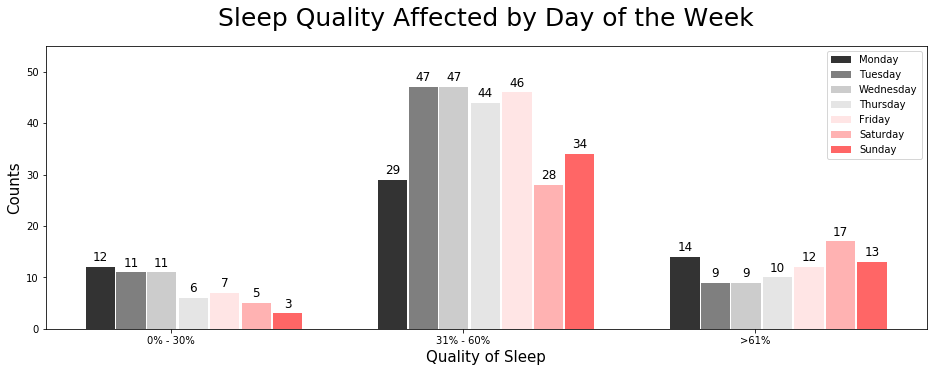

In [38]:
labels = ['0% - 30%', '31% - 60%', '>61%']
Friday = observed.iloc[0][0:].values
Monday = observed.iloc[1][0:].values
Saturday = observed.iloc[2][0:].values
Sunday = observed.iloc[3][0:].values
Thursday = observed.iloc[4][0:].values
Tuesday = observed.iloc[5][0:].values
Wednesday = observed.iloc[5][0:].values

x = np.arange(len(labels))  # the label locations
width = 0.08  # the width of the bars

fig, ax = plt.subplots(figsize=(13,5))
rects1 = ax.bar(x - width*3.002, 
                Monday, 
                .1, 
                label='Monday', 
                color='black',
                alpha=.8)
rects2 = ax.bar(x - width*1.7, 
                Tuesday, 
                .1, 
                label='Tuesday', 
                color='black',
                alpha=.5)
rects3 = ax.bar(x - width*.39, 
                Wednesday, 
                .1, 
                label='Wednesday', 
                color='black',
                alpha=.2)
rects4 = ax.bar(x + width*.96, 
                Thursday, 
                .1, 
                label='Thursday', 
                color='black',
                alpha=.1)
rects5 = ax.bar(x + width*2.31, 
                Friday, 
                .1, 
                label='Friday', 
                color='red',
                alpha=.1)
rects6 = ax.bar(x + width*3.665, 
                Saturday, 
                .1, 
                label='Saturday', 
                color='red',
                alpha=.3)
rects7 = ax.bar(x + width*5, 
                Sunday, 
                .1, 
                label='Sunday', 
                color='red',
                alpha=.6)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Sleep Quality Affected by Day of the Week', 
             size=25, 
             y=1.05)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 55)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', 
                    va='bottom', 
                    size=12)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)


# consider doing a dist plot or scatter plot with the given parameters as a next step
# also, look into a violoin plot; plotly for the following 

fig.tight_layout()
plt.xlabel('Quality of Sleep', size=15)
plt.ylabel('Counts', size=15)
plt.show() 

In [40]:
data = px.data.gapminder()

# new_df = px.data.data(new_df)
sleep_quality_hist = px.histogram(new_df, 
                                  x='Sleep quality',
                                  #  histnorm='percent',
                                  histnorm='probability density',
                                  #  nbins=0,
                                  #  range_x=(0, .3)),
                                  # marginal='rug',
                                  nbins=47,
                                  title='Sleep Quality Distribtion',
                                  labels={'Sleep quality': 'Sleep Quality Distribution'})

# Bar plot: average time asleep, 

avg_tbed = go.Figure()

avg_tbed.add_trace(go.Box(y=new_df['Time in bed'], 
                          name='Time Asleep',   
                          marker_color='royalblue',    
                          boxmean='sd',
                          boxpoints='all', # represent mean and standard deviation
                          notched=True,), )
avg_tbed.update_layout(title_text='Time Asleep (h) Statistics')


timbd_v_qual = px.bar(new_df, 
                      x='Sleep quality', 
                      y='Time in bed',
                      hover_data=['Sleep quality'], 
                      color='Sleep quality',
                      labels={'Time in bed' : 'Time Asleep (h)',
                              'Sleep quality': 'Quality of Sleep'}, 
                      height=400,
                      title='Sample Distribution: Sleep Quality and Time Asleep as it Relates to Activity')

act_v_qual = px.bar(new_df, 
                    x='Sleep quality', 
                    y='Activity (steps)',
                    hover_data=['Sleep quality', 'Time in bed'], 
                    color='Time in bed',
                    labels={'Sleep quality': 'Quality of Sleep Distribution',
                            'Activity (steps)': 'Activity (steps)'}, 
                    height=400,
                    title='Sample Distribution: Sleep Quality as it Relates to Time Asleep')


# data = px.data.ne 
qual_v_wkdy = px.box(new_df, 
                     x='Weekday categories',
                     y='Sleep quality',
                     #  range_y=(0, .4), 
                     points='suspectedoutliers', 
                     category_orders={'Weekday categories':
                                      ['Monday', 'Tuesday', 'Wednesday', 
                                       'Thursday', 'Friday', 'Saturday', 
                                       'Sunday']},
                     notched=True,
                     title='Sleep Quality Throughout the Week',
                     labels={'Weekday categories': 'Day of the Week',})


sleep_quality_hist.show()
avg_tbed.show()
qual_v_wkdy.show()
timbd_v_qual.show()
act_v_qual.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
IFrame(src= "https://dash-simple-apps.plotly.host/dash-boxplot/code", 
       width="100%", 
       height=500, 
       frameBorder="0")

# data = px.data.ne 
qual_v_wkdy = px.box(new_df, 
                     x='Weekday categories',
                     y='Sleep quality',
                     #  range_y=(0, .4), 
                     points='suspectedoutliers', 
                     category_orders={'Weekday categories':
                                      ['Monday', 'Tuesday', 'Wednesday', 
                                       'Thursday', 'Friday', 'Saturday', 
                                       'Sunday']},
                     notched=True)
qual_v_wkdy.show()

In [ ]:
new_df.head()

In [ ]:
new_df.head()

In [ ]:

new_df['Start by hour'] = pd.to_datetime(df['Start'],
                                         infer_datetime_format=True)

new_df['Start by hour'] = np.array(new_df['Start by hour'], 
                                   dtype=np.datetime64)

new_df['Start by hour'] = new_df['Start by hour'].dt.hour

new_df['End by hour'] = pd.to_datetime(df['End'],
                                       infer_datetime_format=True)

new_df['End by hour'] = np.array(new_df['End by hour'], 
                                 dtype=np.datetime64)

new_df['End by hour'] = new_df['End by hour'].dt.hour

new_df['Start by week'] = pd.to_datetime(df['Start'],
                                         infer_datetime_format=True)

new_df['Start by week'] = np.array(new_df['Start by week'], 
                                   dtype=np.datetime64)

new_df['Start by week'] = new_df['Start by week'].dt.week

new_df.head()

In [ ]:
new_df['Start by hour'].value_counts()

In [ ]:
# Scatter plot of the time i go to sleep/wake


# import plotly.express as px
# # iris = px.data.new_df() # iris is a pandas DataFrame
# fig = px.scatter(new_df, x='Start by hour', y='Sleep quality')
# fig.show()


tbed_v_bedt = px.scatter(new_df, 
                         x='Start by hour', 
                         y='Time in bed', 
                         color='Sleep quality', 
                         hover_data=['Sleep quality'],
                         size='Sleep quality',
                         title='Sleep Quality Affected by Bed Time',
                         labels={'Start by hour': 'Bed Time',
                                 'Time in bed': 'Time Asleep (hrs)'},)

tbed_v_wkup = px.scatter(new_df, 
                         x='End by hour', 
                         y='Time in bed', 
                         color='Sleep quality',  
                         hover_data=['Sleep quality'],
                         size='Sleep quality',
                         title='Sleep Quality Affected by Wake-up Time',
                         labels={'End by hour': 'Wake-up Time',
                                 'Time in bed': 'Time Asleep (hrs)'})



wkup_v_bedt = px.scatter(new_df, 
                         x='Start by hour', 
                         y='End by hour', 
                         color='Sleep quality',  
                         hover_data=['Sleep quality', 'Time in bed'],
                         range_x=(-1, 10), 
                         range_y=(0, 15), 
                         size='Sleep quality',
                         title='Early to Bed Late to Rise = Better Sleep',
                         labels={'End by hour': 'Wake-up Time',
                                 'Start by hour': 'Bed Time'})

tbed_v_bedt.show()
tbed_v_wkup.show()
wkup_v_bedt.show()

In [ ]:
weather_df = pd.read_csv('/content/1950768.csv')
weather_df

In [ ]:
weather_df = weather_df.dropna()
weather_df

In [ ]:
weather_df = pd.DataFrame(weather_df.drop(columns='STATION'))
weather_df

In [ ]:
weather_df['DATE'] = weather_df['DATE'].drop_duplicates(keep='first')
weather_df.shape

In [ ]:
weather_df = weather_df.dropna()
print(weather_df.shape)
weather_df.head(3)

In [ ]:
weather_df.columns = ['Date', 'AvgWnd', 'TAvg']

weather_df['Date'] = weather_df['Date'].astype(str)

print(weather_df.head(3))

weather_df.shape

In [ ]:
new_df['Date'] = new_df['Date'].astype(str)

In [ ]:
left = new_df
right = weather_df

concat_df = pd.merge(new_df, 
                     weather_df, 
                     on='Date', 
                     how='inner')
concat_df

In [ ]:
concat_df['Sleep Quality Categories'].isna().sum()

In [ ]:
concat_df = concat_df.dropna()
print(concat_df.shape)
print(concat_df.isnull().any())
concat_df.head(3)

In [ ]:
# concat_df['Date'] = concat_df['Date'].drop_duplicates(keep='first')
# concat_df['Date'] = concat_df['Date'].dropna()
# print(concat_df.shape)
# concat_df.head(4)

In [ ]:
slp_qual_v_dt = px.scatter(concat_df, 
                           x='Date', 
                           y='TAvg', 
                           color='Sleep quality', 
                           size='Time in bed', 
                           hover_data=['Sleep quality'],
                           labels={'Date': 'Time of Year',
                                 'TAvg': 'Average T (F)'},
                           title='Sleep Affected by Temperature')

# comp_grph = px.scatter(concat_df, 
#                        x='Date', 
#                        y='TAvg', 
#                        color='Sleep quality', 
#                        size='Time in bed', 
#                        hover_data=['Sleep quality'],
#                        labels={'Date': 'Time of Year',
#                                 'TAvg': 'Average T (F)'})

time_v_temp = px.scatter(concat_df, 
                         x='Date', 
                         y='TAvg',
                         color='TAvg', 
                         size='TAvg',
                         hover_data=['Sleep quality'],
                         labels={'Date': 'Time of Year',
                                 'TAvg': 'Average T (F)'},
                         title='Temperature Through the Year')

slp_qual_v_wnd = px.scatter(concat_df, 
                            x='Date', 
                            y='AvgWnd', 
                            color='Sleep quality', 
                            size='Time in bed', 
                            hover_data=['Sleep quality'],
                            labels={'Date': 'Time of Year',
                                 'AvgWnd': 'Average Wind Speed (m/s)'},
                            title='Sleep Affected by Wind Speeds')

time_v_wnd = px.scatter(concat_df, 
                        x='Date', 
                        y='AvgWnd', 
                        color='AvgWnd', 
                        size='AvgWnd',   
                        hover_data=['Sleep quality'],
                        labels={'Date': 'Time of Year',
                              'AvgWnd': 'Average Wind Speed (m/s)'},
                        title='Wind Speeds Through the Year')

slp_qual_v_time_in_bed = px.scatter(concat_df, 
                                    x='Time in bed', 
                                    y='Sleep quality', 
                                    color='Sleep quality', 
                                    size='Time in bed', 
                                    hover_data=['Sleep quality'],
                                    labels={'Time in bed': 'Time Asleep (h)'},
                                    title='Sleep Quality Affected by Time Asleep')

# comp_grph.show()
time_v_temp.show()
time_v_wnd.show()
slp_qual_v_wnd.show()
slp_qual_v_dt.show()
slp_qual_v_time_in_bed.show()